<a href="https://colab.research.google.com/github/vikranth1106/DSA0216/blob/main/ACTIVITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVITY-1

IMAGE SEGMENTIOV IN OPEN CV


**DESCRIPTION:**

**Image Segmentation**

This program performs automatic image segmentation using OTSU thresholding and morphological operations.

**1: Original Image**

Displays the uploaded input image.

This is the raw image before processing.

**2: Mask Image**

Generated using OTSU thresholding.

Separates foreground and background automatically.

White region → Detected object

Black region → Background

Morphological closing is applied to remove small holes and noise.

**3: Segmented Image**

The mask is applied to the original image.

Only the detected foreground object remains visible.

Background is removed (set to black).

**4: Saved Output**

The final segmented image is saved as:

segmented_output.png


Saving Y67.JPG to Y67.JPG


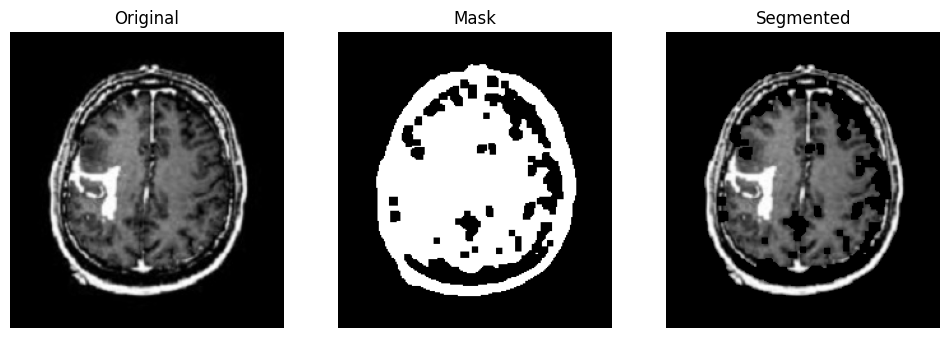

In [8]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
pil_img = Image.open(image_path).convert("RGB")
img = np.array(pil_img)
original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, thresh = cv2.threshold(
    blur, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
mask_binary = mask // 255
segmented = original * np.stack([mask_binary]*3, axis=-1)
segmented_pil = Image.fromarray(segmented.astype(np.uint8))
segmented_pil.save("segmented_output.png")
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(original)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Segmented")
plt.imshow(segmented)
plt.axis("off")
plt.show()

ACTIVITY-2:

COUNTER BASED IMAGE SEGMENTATION

DESCRIPTION:

Contour Detection

After running the program, the following outputs are generated:

1: Original Image

Displays the uploaded image.

This is the input image provided by the user.

2:Canny Edge Image

Shows the detected edges using Canny Edge Detection.

White lines represent object boundaries.

Noise is reduced using Gaussian Blur before edge detection.

3: Contours Detected Image

Green lines are drawn around detected object boundaries.

These lines represent the contours found in the image.

The total number of contours detected is printed in the output console.

4: Console Output

Displays:

Number of Contours Found: X

where X is the total detected objects/edges.

5: Saved Output File

The final contour image is saved as:

contour_output.png

This image contains the original picture with green contour outlines.

Saving Y52.jpg to Y52.jpg
Number of Contours Found: 172


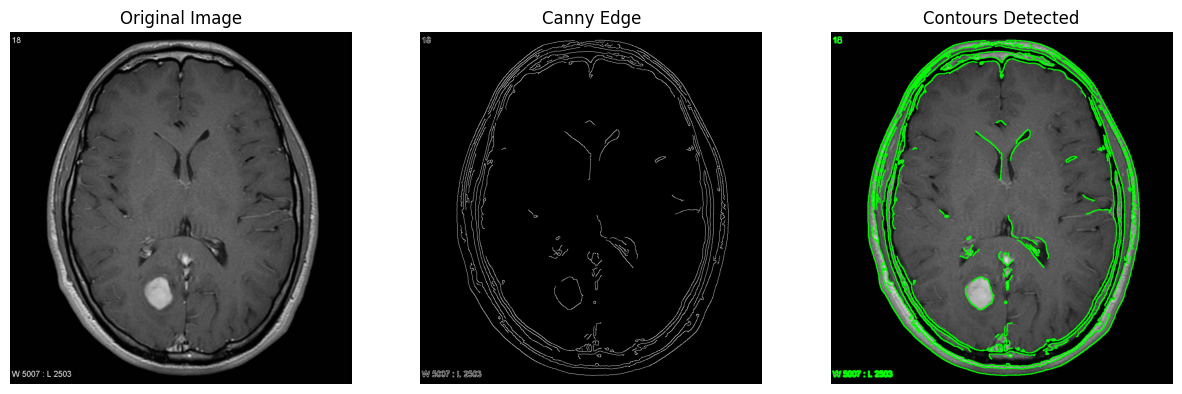

✅ Contour Detection Completed!
📁 Output Saved as contour_output.png


In [9]:
!pip install opencv-python pillow
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
pil_img = Image.open(image_path).convert("RGB")
img_np = np.array(pil_img)
gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 50, 150)
contours, hierarchy = cv2.findContours(
    edges,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)
print("Number of Contours Found:", len(contours))
contour_img = img_np.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(contour_img)
plt.title("Contours Detected")
plt.axis("off")
plt.show()
cv2.imwrite("contour_output.png", cv2.cvtColor(contour_img, cv2.COLOR_RGB2BGR))
print("✅ Contour Detection Completed!")
print("📁 Output Saved as contour_output.png")

ACTIVITY-3:

REGION BASED IMAGE SEGMENTATION

**Region Based Segmentation**

This program performs region-based segmentation using the Region Growing technique.

**1: Original Image**

Displays the uploaded input image.

This is the raw image before processing.

**2: Region Mask**

Generated using region growing algorithm.

White area → Detected region (similar intensity pixels).

Black area → Background.

The region expands from the selected seed point based on pixel similarity.

**3: Region Based Segmented Image**

The mask is applied to the original image.

Only the detected region remains visible.

Background is removed (appears black).

**4: Saved Output**

The final result is saved as:

region_based_output.png

Saving Y51.jpg to Y51.jpg


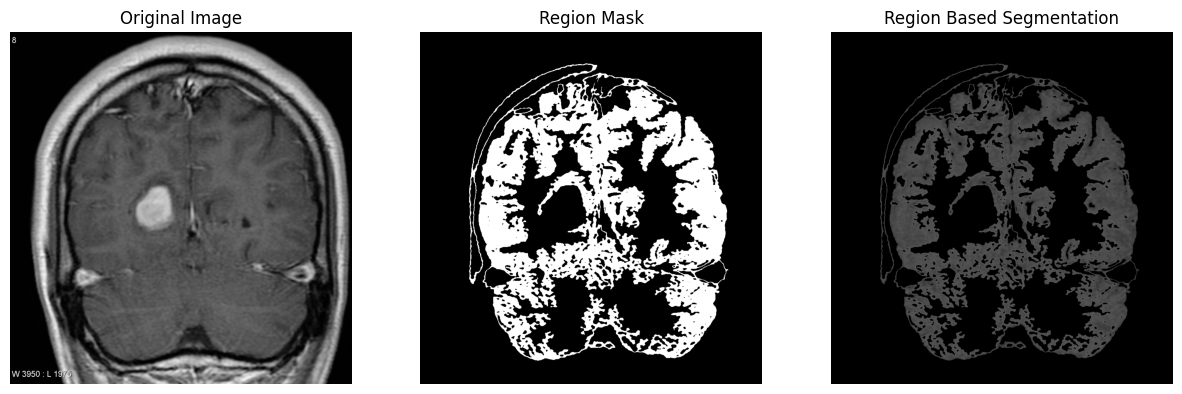

✅ Region-Based Detection Completed!
📁 Output saved as region_based_output.png


In [13]:
!pip install opencv-python pillow
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
pil_img = Image.open(image_path).convert("RGB")
img = np.array(pil_img)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
def region_growing(image, seed, threshold=10):
    h, w = image.shape
    segmented = np.zeros((h, w), np.uint8)
    visited = np.zeros((h, w), bool)
    seed_value = image[seed]
    stack = [seed]
    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue
        visited[x, y] = True
        if abs(int(image[x, y]) - int(seed_value)) <= threshold:
            segmented[x, y] = 255
            for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
                nx, ny = x+dx, y+dy
                if 0 <= nx < h and 0 <= ny < w:
                    stack.append((nx, ny))
    return segmented
seed_point = (gray.shape[0]//2, gray.shape[1]//2)
segmented_mask = region_growing(gray, seed_point, threshold=15)
mask_binary = segmented_mask // 255
segmented_img = img * np.stack([mask_binary]*3, axis=-1)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Region Mask")
plt.imshow(segmented_mask, cmap="gray")
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Region Based Segmentation")
plt.imshow(segmented_img)
plt.axis("off")
plt.show()
output = Image.fromarray(segmented_img.astype(np.uint8))
output.save("region_based_output.png")
print("✅ Region-Based Detection Completed!")
print("📁 Output saved as region_based_output.png")
